# 기본 라이브러리 설치 #
아래 import 항목은 딥러닝 사용 시 기본적으로 설치되어야 하는 항목입니다.<br>
Anaconda 사용자의 경우 cmd에 아래와 같이 설치하시면 됩니다.<br>
> pip install something <br>
ex1) pip install keras <br>
GPU 사용자는 pip install tensorflow-gpu 로 설치해야 합니다.<br>
설치방법 : [tensorflow GPU 설치 방법](https://github.com/gaussian37/Machine-Learning/blob/master/Deep%20Learning/Library/%E2%98%86%20Setting/Tensorflow%20%EC%82%AC%EC%9A%A9%20%EC%8B%9C%20GPU%20%EC%84%B8%ED%8C%85%20%EB%B0%A9%EB%B2%95.md)

In [1]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import pydot
import h5py

import tensorflow
import keras

Using TensorFlow backend.


## MNIST 데이터를 다운 받은 후 예제를 실행해 보겠습니다. ##

In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [5]:
model = Sequential()
model.add(Dense(units = 64, input_dim = 28 * 28, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 5, batch_size = 32)

Epoch 1/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.6905 - acc: 0.8234
Epoch 2/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.3490 - acc: 0.9017
Epoch 3/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.2991 - acc: 0.9151
Epoch 4/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.2697 - acc: 0.9236
Epoch 5/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.2480 - acc: 0.9308


In [6]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size = 32)
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 1s 87us/step
loss_and_metrics : [0.22945994091182947, 0.93569999999999998]


## graph visualization ##

- graphviz 다운로드 : https://graphviz.gitlab.io/_pages/Download/Download_windows.html
- graphviz-2.xx.msi (ex. graphviz-2.38 msi) 파일을 받습니다.
- 제어판 → 시스템 및 보안 → 시스템 → 고급 시스템 설정 → 환경 변수 에서 다음을 추가합니다.<br>
  1) 시스템 변수 추가 <br>
     &nbsp;&nbsp;&nbsp;&nbsp;변수 이름 : GRAPHVIZ_DOT<br>
     &nbsp;&nbsp;&nbsp;&nbsp;변수 값 : C:\Program Files (x86)\Graphviz2.38\bin\dot.exe<br>
![system variable](https://i.imgur.com/Fp3Au8R.jpg)

   2) 환경 변수 추가 <br>
     &nbsp;&nbsp;&nbsp;&nbsp;변수 값 : C:\Program Files (x86)\Graphviz2.38\bin
     ![path](https://i.imgur.com/JXsOMu9.jpg)

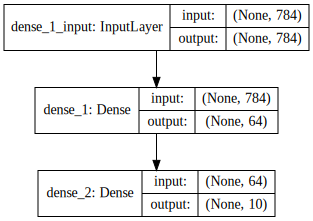

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model2 = load_model('mnist_mlp_model.h5')